<a href="https://colab.research.google.com/github/hamdi-ridha/AIoT-GCR3-21-22/blob/main/AIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

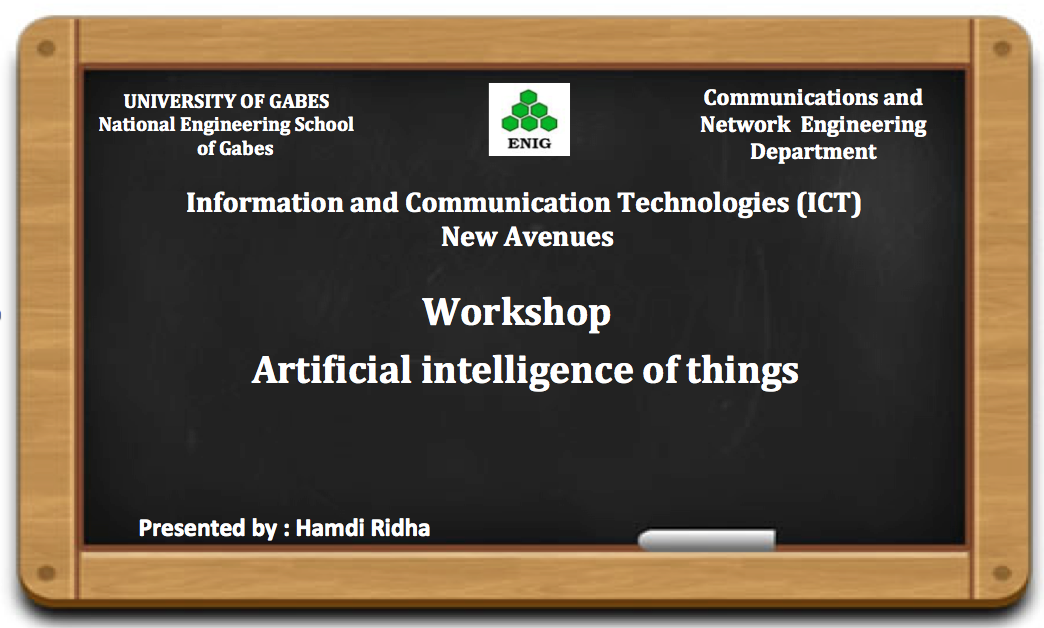

## **Part A: Introduction to Colab (Some basics)**

**1 - What is Google Colaboratory and what are the benefits?**

Google Colab or Colaboratory is a cloud service, offered (free) by Google, based on Jupyter Notebook and intended for training and research in machine learning.

Colab allows to:

 - Improve your coding skills in the Python programming language.

 - Develop deep learning applications using popular Python libraries such as Keras, TensorFlow, PyTorch and OpenCV.

 - Use a development environment (Jupyter Notebook) that does not require any configuration.

But the feature that sets Colab apart from other services is access to GPU and TPU processors, for free!

**2- How to add new form fields**

In [ ]:

x = '  #@param
y = ''  #@param {type: "string"}
v = 149  #@param {type: "slider", min: 100, max: 200}
n = 102222222  #@param {type: "number"}
date = '2021-02-27'  #@param {type: "date"}
day = "tuesday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select = "PhD" #@param ["GCR", "GEA", "GCP", "GM", "GCV", "Master", "PhD"] {allow-input: true}
#@markdown ---


**3 - How to connect Google Colab with Google Drive?**

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**4 - How to List, access  and *download* folders and files on the Drive?**

 **(Execute Linux commands)**

In [ ]:
! ls /content/gdrive/MyDrive

In [23]:
!cd /content/gdrive/MyDrive/GCR3

In [ ]:
!sudo apt install tesseract-ocr

In [25]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-10-13 11:45:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.208, 172.217.9.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  66.0MB/s    in 1.0s    

2021-10-13 11:45:23 (66.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## **Part B: Examples of how to use an IoT analytics platform services and protocols**

**1- How to send data to Thingspeak platform using an API based on a HTTP/HTTPS protocol ?**

In [27]:
import time
from random import random
from urllib.request import urlopen
myAPI = 'SMAO1HDHRUCP6TZY' # 'put here your API Key'
# URL where we will send the data, Don't change it
baseURL = 'https://api.thingspeak.com/update?api_key=%s' % myAPI
while True:
   temp = 100*random()
   # Sending the data to thingspeak
   conn = urlopen(baseURL + '&field3=%s' % temp)
   time.sleep(1)
# Closing the connection
conn.close()

KeyboardInterrupt: ignored

**2- Example of how to use MQTT protocol ?**

In [ ]:
! pip install paho-mqtt

     |████████████████████████████████| 101 kB 10.9 MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.1-py3-none-any.whl size=61565 sha256=dc815d540506319e2ff8238a395c5d9d74139bd533e660436ffb2bfea62ee3d5
  Stored in directory: /root/.cache/pip/wheels/c9/be/2a/883db47312c70ef7ffcaff281f3294e3075f62da075474d4bb
Successfully built paho-mqtt


In [28]:
import paho.mqtt.client as mqtt
# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("ENIG/GCR/#")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("broker.mqttdashboard.com", 1883, 60) 

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()
# Non blocking : client.loop_start()  N.B. need a while True: statement


Connected with result code 0
ENIG/GCR/GCR3 b'hello'
ENIG/GCR/GCR3 b'hello  GCR3'


KeyboardInterrupt: ignored

## **Part C: Examples of how to access to our webcam and microphone inside Google Colab notebook**

**1- Using a webcam to capture images for processing on the runtime**

In [29]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

**2- Show the image which was just taken**

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**3- Playing video**

In [32]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/gdrive/MyDrive/Colab-Notebooks-Wokshop/chrono.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 hight=1500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**Record audio from your microphone**

In [33]:
!pip install ffmpeg-python

In [36]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [38]:
audio, sr = get_audio()

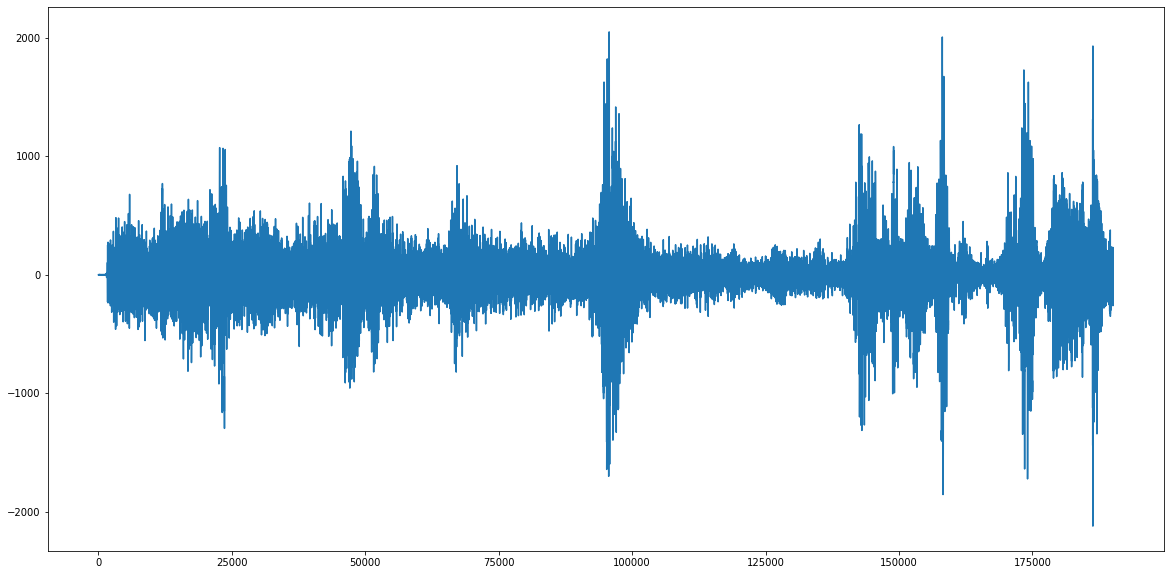

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

## **Part D: Examples of how to use Speech recognition and Google Text-to-Speech (gTTS)**




**1- Google Text-to-Speech**

gTTS (Google Text-to-Speech), a Python library and CLI tool to interface with Google Translate's text-to-speech API.

In [40]:
!pip install gTTS

In [41]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS('hello GCR students !. Welcome to this  workshop. I\'m gonna explain you what you need to know to get started with AI and AIoT')
tts.save('file1.wav')
Audio('file1.wav',autoplay=True)  

**2- Speech recognition**

In [42]:
#@title
import os
from os.path import exists, join, basename, splitext

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 155094 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

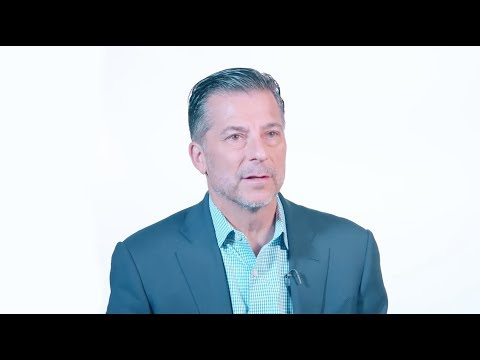

In [43]:
YOUTUBE_ID = "tn6BiwLLyMU"
YouTubeVideo(YOUTUBE_ID)

In [44]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav

[youtube] tn6BiwLLyMU: Downloading webpage
[youtube] tn6BiwLLyMU: Downloading MPD manifest
[download] Destination: test.m4a
[download] 100% of 395.72KiB in 00:07
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2021-10-13 12:08:12.644149: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-13 12:08:12.660321: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2021-10-13 12:08:12.765693: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-13 12:08:12.765747: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does no

# **Part E: Optical Character Recognition  (OCR)**

In [45]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [47]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

Img=Image.open('/content/CaptureX.png')
extractedInformation = pytesseract.image_to_string(Img)
print(extractedInformation)

The MQTT Dashboard utilizes the HiveMQ MQTT broker. You can use any MQTT client or library to publish to the broker.

 

Testing and usage is for free but please do not use it for sensitive information because everybody is allowed to subscribe to
every topic, including wildcard. Feel free to play with MQTT and the HiveMQ broker. Please consider to add a reconnect logic to
your client because we may update the underlaying HiveMQ instance at any time, so we cannot promise 100% uptime.

With our free, fully managed MQTT Cloud Platform HiveMQ Cloud you can create reliable, scalable and secure MQTT cloud-
broker clusters that are built for production. Sign up and you are ready to connect up to 100 loT devices at no cost (no credit
card required).



# **Part F: Objects detection**

In [48]:
!pip install opencv-contrib-python
!pip install common
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml

--2021-10-13 12:12:56--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.008s  

2021-10-13 12:12:56 (109 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2021-10-13 12:12:57--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent

In [ ]:
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

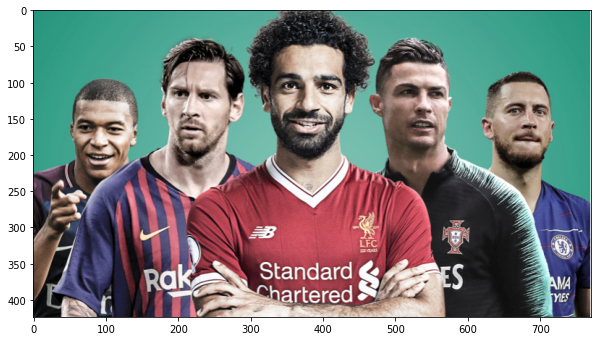

In [50]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('/content/gdrive/MyDrive/face-test.png')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

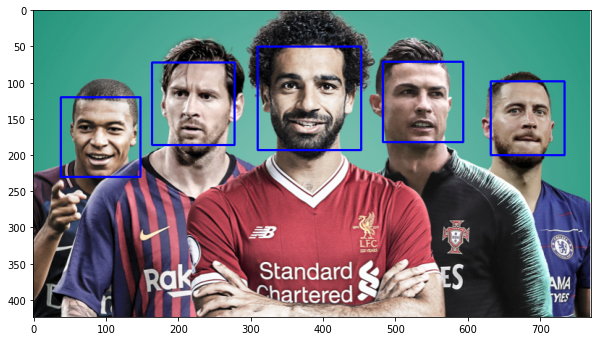

In [52]:
# this is a pre-trained face cascade
test_image = cv2.imread('/content/gdrive/MyDrive/face-test.png')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

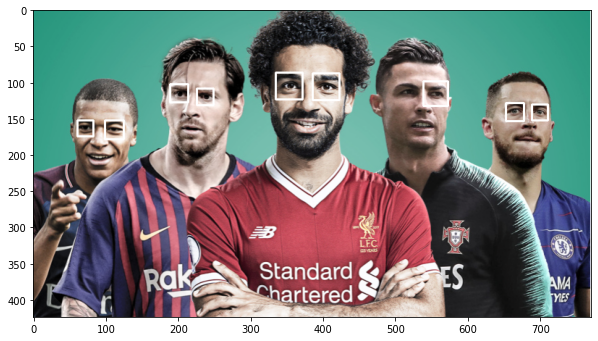

In [53]:
test_image = cv2.imread('/content/gdrive/MyDrive/face-test.png')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))